## Forecasting Sales for 2019 (Technology)
* <strong>In[1]</strong>    Importing Given Data 
* <strong>In[4]</strong>    Stationarity Test
* <strong>In[6]</strong>    Using Statsmodels to get the trend
* <strong>In[11]</strong>   Decomposition of Time Series
* <strong>In[13]</strong>   Simple Moving Average(SMA)
* <strong>In[16]</strong>   Exponentially Weighted Moving Average (EWMA)
* <strong>In[19]</strong>   Double Exponential Smoothing
* <strong>In[21]</strong>   Triple Exponential Smoothing
* <strong>In[21]</strong>   Models 
    * <strong>In[21]</strong>  1. Holt-Winters-Method
        * <strong>In[24]</strong>  Train-Test Split
        * <strong>In[26]</strong>  Fitting model on test data
        * <strong>In[32]</strong>  Evaluation of Models(MSE,RMSE)   
        * <strong>In[33]</strong>  Retrain the model on the full data, and forecast the future (Sales for 2019) 
    * <strong>In[40]</strong>  2. Auto Regressive Model of order (p): (AR(p))
        * <strong>In[40]</strong>  Train-Test Split
        * <strong>In[45]</strong>  Fitting model on test data
        * <strong>In[55]</strong>  Evaluation of Models(MSE,RMSE)   
        * <strong>In[56]</strong>  Retrain the model on the full data, and forecast the future (Sales for 2019) 
    * <strong>In[62]</strong>  3. Auto Regressive Moving Average: (ARMA) 
        * <strong>In[62]</strong>  Train-Test Split
        * <strong>In[63]</strong>  Fitting model on test data
        * <strong>In[66]</strong>  Evaluation of Models(MSE,RMSE)   
        * <strong>In[68]</strong>  Retrain the model on the full data, and forecast the future (Sales for 2019) 
    * <strong>In[70]</strong>  4. Auto Regressive Integrated Moving Average: (ARIMA)
        * <strong>In[70]</strong>  Train-Test Split
        * <strong>In[71]</strong>  Fitting model on test data
        * <strong>In[75]</strong>  Evaluation of Models(MSE,RMSE)   
        * <strong>In[76]</strong>  Retrain the model on the full data, and forecast the future (Sales for 2019) 
    * <strong>In[78]</strong>  5. Seasonally Auto Regressive Integrated Moving Average: (SARIMA)
        * <strong>In[80]</strong>  Train-Test Split
        * <strong>In[81]</strong>  Fitting model on test data
        * <strong>In[85]</strong>  Evaluation of Models(MSE,RMSE)   
        * <strong>In[86]</strong>  Retrain the model on the full data, and forecast the future (Sales for 2019) 
* <strong>In[89]</strong>    Final conclusion


## Importing Given Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from statsmodels.tsa.stattools import adfuller

dataset=pd.read_excel(r'C:\Users\Dell\Desktop\BIBirbal\Sales-Modified-Superstore-Ver-5.xlsx')

df=dataset.rename(columns={'Customer ID':'Customer_ID','Customer Name':'Customer_Name','Order Date ':'Order_Date','Ship Date':'Ship_Date','Credit Days':'Credit_Days','Ship Mode':'Ship_Mode','Payment Date':'Payment_Date','Product ID':'Product_ID','Product Name':'Product_Name','Region ':'Region','Sub-Category':'Sub_Category','Discount (in %)':'Discount_inPercentage','Sales Person ID':'Sales_Person_ID','Sales Person Name':'Sales_Person_Name','Order ID':'Order_ID'})

df['year_month']=df['Order_Date'].apply(lambda x: x.strftime('%Y-%m'))

data=pd.read_excel(r'C:\Users\Dell\Desktop\BIBirbal\data.xlsx')
data_coded=pd.read_excel(r'C:\Users\Dell\Desktop\BIBirbal\data_coded.xlsx')
data_date_index=pd.read_excel(r'C:\Users\Dell\Desktop\BIBirbal\data_date_index.xlsx',index_col=0,parse_dates=True)

In [2]:
Category_dummies = pd.get_dummies(data_coded['Category_coded'])
Region_dummies = pd.get_dummies(data_coded['Region_coded'])
segment_dummies = pd.get_dummies(data_coded['Segment_coded'])

In [3]:
df_clean = pd.concat([data_coded,Category_dummies,Region_dummies,segment_dummies],axis = 1)
df_clean=df_clean.rename(columns={1:'Technology',2:'OfficeSupplies',3:'Furniture'})
df_clean=df_clean.rename(columns={1:'East',2:'West',3:'South',4:'North',5:'Central'})
df_clean=df_clean.rename(columns={1:'Consumer', 2:'Home Office', 3:'Corporate'})

data_Technology=data[data.Category=='Technology']

___
# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>




In [4]:
#Grouping Sales month
df2=data_Technology.groupby(['year_month']).sum()["Sales"]
print(df2.head)

<bound method NDFrame.head of year_month
2016-01     2011705.60
2016-02     1029446.40
2016-03    20807151.36
2016-04     5885077.76
2016-05     6143920.64
2016-06     5399017.60
2016-07     5122645.76
2016-08     5894182.40
2016-09    19544046.08
2016-10     7640331.52
2016-11    19328901.12
2016-12    13371642.88
2017-01     2960226.56
2017-02     2207340.80
2017-03     6620110.08
2017-04     7143009.28
2017-05     7451520.00
2017-06     4118634.24
2017-07     6637418.24
2017-08     9935764.48
2017-09    12170961.92
2017-10     6851129.60
2017-11    15279104.64
2017-12    22804497.92
2018-01     3596842.24
2018-02     7845704.96
2018-03    13803425.28
2018-04     9529921.28
2018-05    18452922.24
2018-06    10478177.28
2018-07     8492160.00
2018-08     6190337.28
2018-09    14645379.84
2018-10    20181359.36
2018-11    17370277.76
2018-12    14286567.68
Name: Sales, dtype: float64>


In [5]:
### Stationarity Check with Augmented Dickey-Fuller test

test_result=adfuller(df2)

# Ho: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','#Lages Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis(Ho),reject Ho. Data has no unit root and Indicating it is stationary (it does not time-dependent structure)")
    else:
        print("weak evidence against the null hypothesis(Ho), time series has a unit root, Indicating it is non-stationary (It has some time dependent structure)")

        
adfuller_test(df2)

ADF Test Statistic : -5.112170118855534
p-value : 1.3250193941832136e-05
#Lages Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho),reject Ho. Data has no unit root and Indicating it is stationary (it does not time-dependent structure)


## Using Statsmodels to get the trend

    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [6]:
data=data[data.Category=='Technology']

from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
Sales_cycle,Sales_trend = hpfilter(data['Sales'], lamb=129600)


In [7]:
data['trend'] = Sales_trend


In [8]:
#Grouping Sales month
data=data[['year_month','Sales','trend']]
data_Sales=data.groupby(['year_month']).sum()
print(data_Sales.head())

                  Sales         trend
year_month                           
2016-01      2011705.60  3.874199e+06
2016-02      1029446.40  3.849546e+06
2016-03     20807151.36  1.143073e+07
2016-04      5885077.76  1.047216e+07
2016-05      6143920.64  7.028912e+06


### Plot the dataset

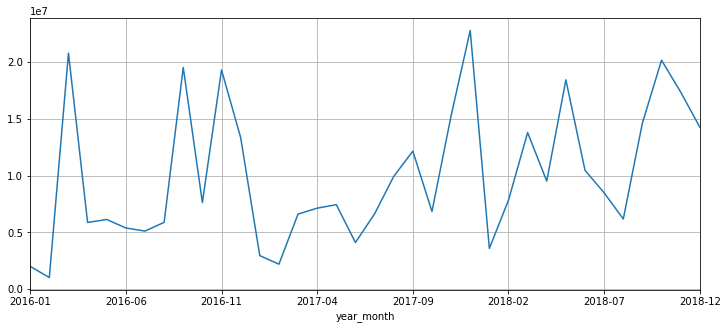

In [9]:
data_Sales['Sales'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
plt.grid()

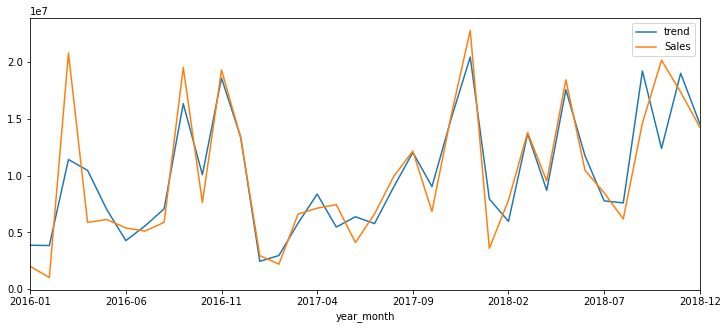

In [10]:
data_Sales[['trend','Sales']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

## ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.



## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time  .<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate .



In [11]:
#Grouping Sales month
data_date_index=data_date_index[data_date_index.Category=='Technology']

data_Sales=data_date_index.groupby(['year_month']).sum()
print(data_Sales.head())

            Credit_Days  Quantity        Sales       Profit  \
year_month                                                    
2016-01-01          375        45   2011705.60   547695.104   
2016-02-01          315        33   1029446.40   361936.448   
2016-03-01          855        84  20807151.36   228461.824   
2016-04-01         1005       110   5885077.76  1237917.760   
2016-05-01         1155        88   6143920.64   858484.992   

            Discount_inPercentage  Unit_Price  
year_month                                     
2016-01-01                    0.6    518841.6  
2016-02-01                    0.2    326003.2  
2016-03-01                    3.3   6820179.2  
2016-04-01                    2.6   1518508.8  
2016-05-01                    3.6   2364134.4  


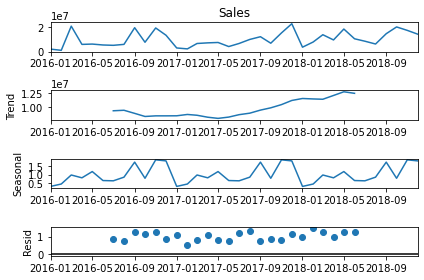

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data_Sales['Sales'], model='multiplicative')  # model='add' also works
result.plot();

___
# SMA
## Simple Moving Average

Create a <a href='https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average'>simple moving average</a> by applying a <tt>mean</tt> function to a rolling window.


In [13]:
data_Sales['6-month-SMA'] = data_Sales["Sales"].rolling(window=6).mean()
data_Sales['12-month-SMA'] = data_Sales["Sales"].rolling(window=12).mean()

In [14]:
data_Sales.head(15)

,Credit_Days,Quantity,Sales,Profit,Discount_inPercentage,Unit_Price,6-month-SMA,12-month-SMA
year_month,,,,,,,,
2016-01-01,375,45,2011705.60,547695.104,0.6,518841.6,NaN,NaN
2016-02-01,315,33,1029446.40,361936.448,0.2,326003.2,NaN,NaN
2016-03-01,855,84,20807151.36,228461.824,3.3,6820179.2,NaN,NaN
2016-04-01,1005,110,5885077.76,1237917.760,2.6,1518508.8,NaN,NaN
2016-05-01,1155,88,6143920.64,858484.992,3.6,2364134.4,NaN,NaN
2016-06-01,765,77,5399017.60,863216.960,3.5,1824883.2,6.879387e+06,NaN
2016-07-01,1080,103,5122645.76,810424.256,3.2,2123744.0,7.397877e+06,NaN
2016-08-01,1065,126,5894182.40,1207700.864,2.4,1996665.6,8.208666e+06,NaN
2016-09-01,1785,168,19544046.08,-147224.576,8.2,7453446.4,7.998148e+06,NaN


<AxesSubplot:xlabel='year_month'>

<Figure size 864x432 with 0 Axes>

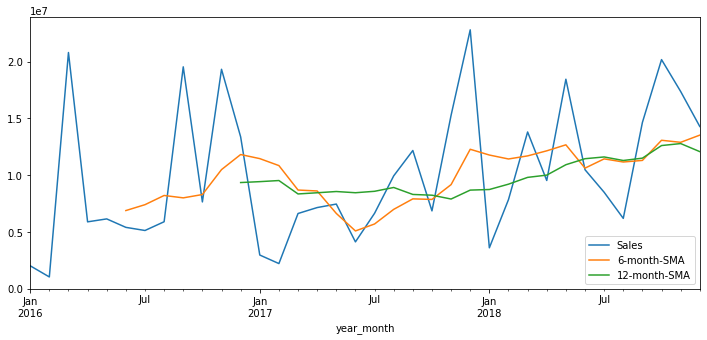

In [15]:
plt.figure(figsize=(12,6))
data_Sales[['Sales','6-month-SMA','12-month-SMA']].plot(figsize=(12,5))

___
# EWMA
## Exponentially Weighted Moving Average 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [16]:
data_Sales['EWMA12'] = data_Sales["Sales"].ewm(span=12,adjust=False).mean()

<AxesSubplot:xlabel='year_month'>

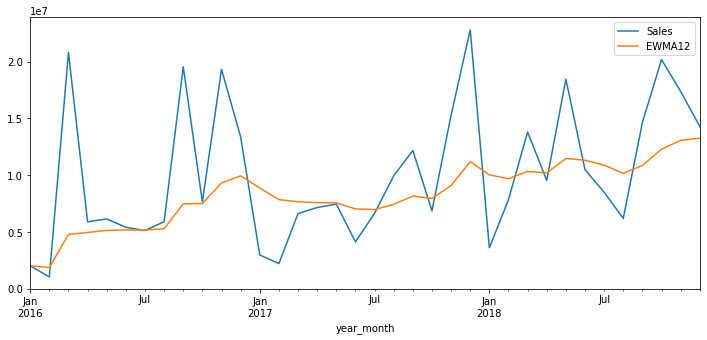

In [17]:
data_Sales[['Sales','EWMA12']].plot(figsize=(12,5))

## Comparing SMA to EWMA

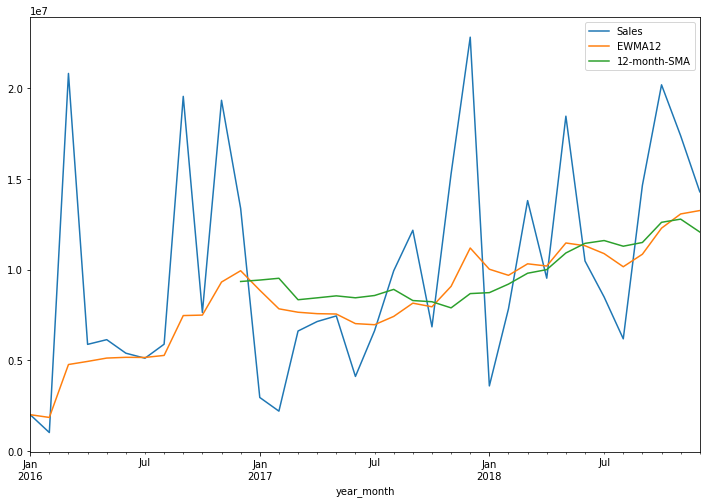

In [18]:
data_Sales[['Sales','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);


## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data_Sales['DESadd12'] = ExponentialSmoothing(data_Sales['Sales'], trend='add').fit().fittedvalues.shift(-1)
data_Sales['DESmul12'] = ExponentialSmoothing(data_Sales['Sales'], trend='mul').fit().fittedvalues.shift(-1)


C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization fail

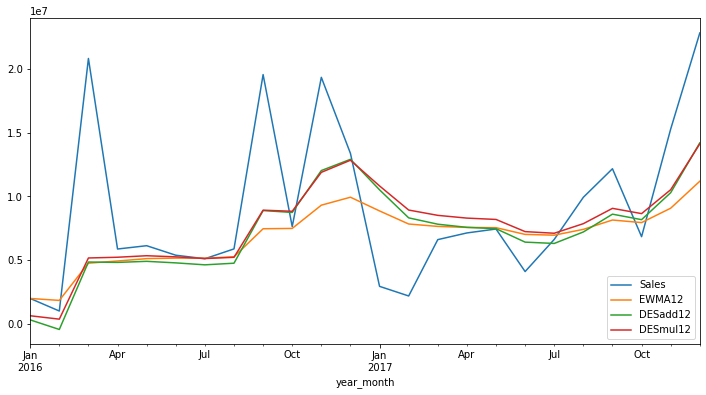

In [20]:
data_Sales[['Sales','EWMA12','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);


## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with **Holt-Winters**, adds support for both trends and seasonality in the data. 



In [21]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

data_Sales['TESadd12'] = ExponentialSmoothing(data_Sales['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data_Sales['TESmul12'] = ExponentialSmoothing(data_Sales['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

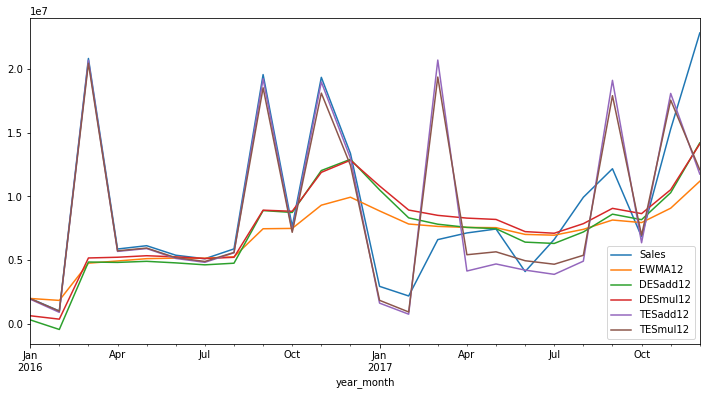

In [22]:
data_Sales[['Sales','EWMA12','DESadd12','DESmul12','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

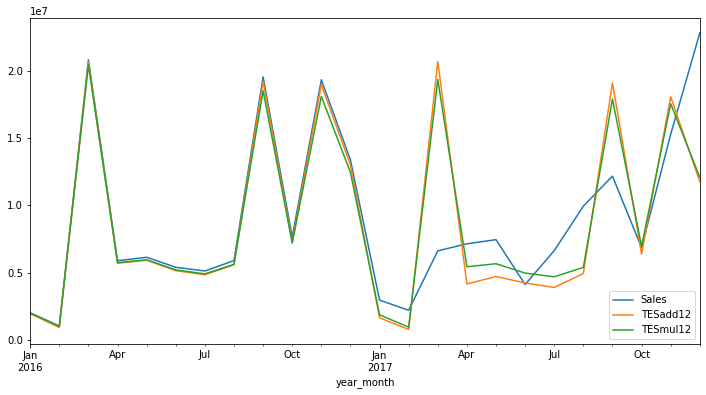

In [23]:
data_Sales[['Sales','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Train Test Split

In [24]:
#We have data for 3 years and we want to predict it for MONTHLY. so use 2 years data for train and 1 for test.
print(data_Sales.shape)
train,test=data_Sales[0:24],data_Sales[24:36]
print(train.shape,test.shape)


(36, 13)
(24, 13) (12, 13)


In [25]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

##  Fitting model on test data

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [27]:
test_predictions = fitted_model.forecast(12).rename('HW Forecast')

In [28]:
test_predictions

2018-01-01    1.761736e+06
2018-02-01    8.961484e+05
2018-03-01    1.799992e+07
2018-04-01    5.060819e+06
2018-05-01    5.251487e+06
2018-06-01    4.586675e+06
2018-07-01    4.325849e+06
2018-08-01    4.947521e+06
2018-09-01    1.630403e+07
2018-10-01    6.335401e+06
2018-11-01    1.593060e+07
2018-12-01    1.095423e+07
Freq: MS, Name: HW Forecast, dtype: float64

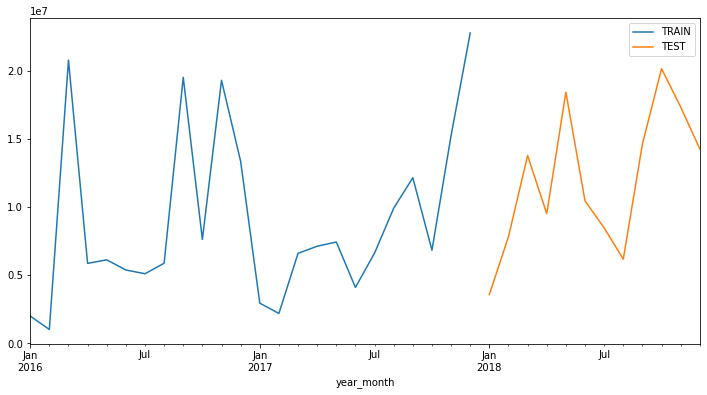

In [29]:
train['Sales'].plot(legend=True,label='TRAIN')
test['Sales'].plot(legend=True,label='TEST',figsize=(12,6));

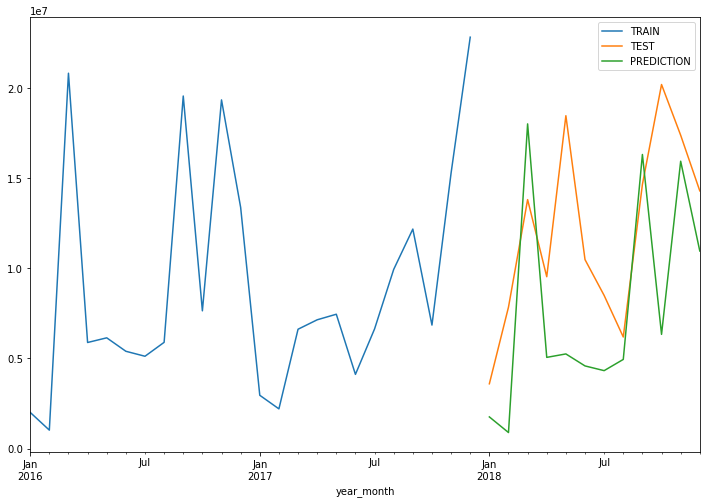

In [30]:
train['Sales'].plot(legend=True,label='TRAIN')
test['Sales'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


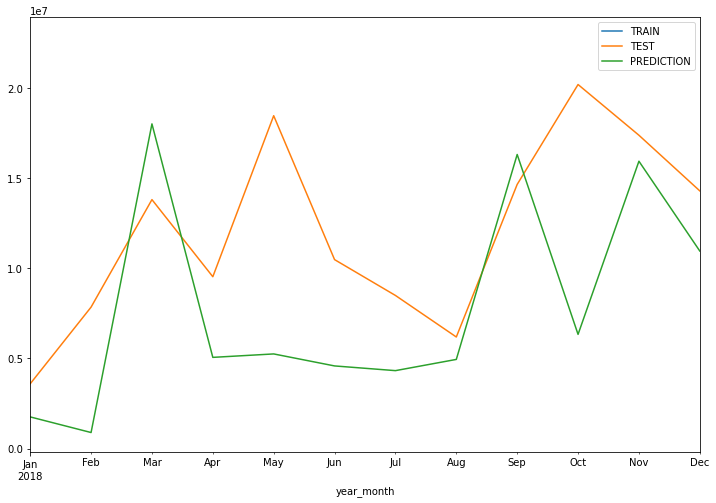

In [31]:
train['Sales'].plot(legend=True,label='TRAIN')
test['Sales'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2018-01-01','2018-12-01']);

## Evaluation of Models(MSE,RMSE)

In [32]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test['Sales'], test_predictions)
print(f'mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test['Sales'], test_predictions)
print(f' MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test['Sales'], test_predictions)
print(f' RMSE Error: {error_RMSE:11.10}')

mean_absolute_error: 5185746.057
 MSE Error: 4.373138943e+13
 RMSE Error: 6612971.301


## Retrain the model on the full data, and forecast the future (Sales for 2019) 

In [33]:
final_model = ExponentialSmoothing(data_Sales['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
model_forecast = final_model.forecast(12)
model_forecast

2019-01-01    2.760817e+06
2019-02-01    4.085297e+06
2019-03-01    1.304270e+07
2019-04-01    7.188637e+06
2019-05-01    1.096223e+07
2019-06-01    6.688603e+06
2019-07-01    6.351491e+06
2019-08-01    6.372084e+06
2019-09-01    1.404619e+07
2019-10-01    1.176536e+07
2019-11-01    1.568779e+07
2019-12-01    1.539462e+07
Freq: MS, dtype: float64

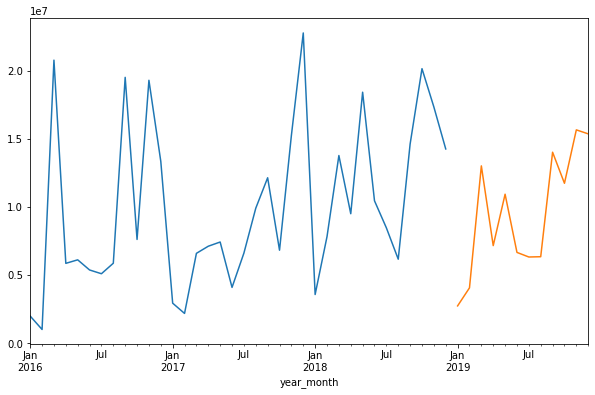

In [34]:
data_Sales['Sales'].plot(figsize=(10,6))
model_forecast.plot();

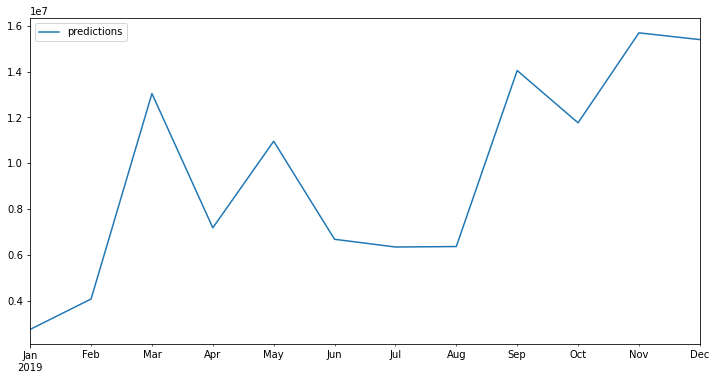

In [35]:
model_forecast.plot(label='predictions',figsize=(12,6))
plt.legend()
plt.show()

## Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>


# Introduction to ARIMA Models
We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

## ACF Plots
Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.


In [36]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [37]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(data_Sales['Sales'])

array([ 1.        ,  0.13259553, -0.05698339,  0.02672319, -0.08109124,
        0.02006656,  0.19353518, -0.07814306, -0.01043558, -0.03888738,
       -0.11305083,  0.01430282,  0.29502404,  0.12641086, -0.01702035,
        0.00581304, -0.15635287, -0.04795856,  0.0731731 , -0.15632779,
       -0.04959961, -0.04270702, -0.22313859, -0.05869392,  0.159254  ,
        0.0520744 ,  0.06372658, -0.08308106, -0.14847202, -0.11250246,
        0.00490865,  0.04018854, -0.05211665, -0.07909883, -0.07559016,
       -0.02654511])

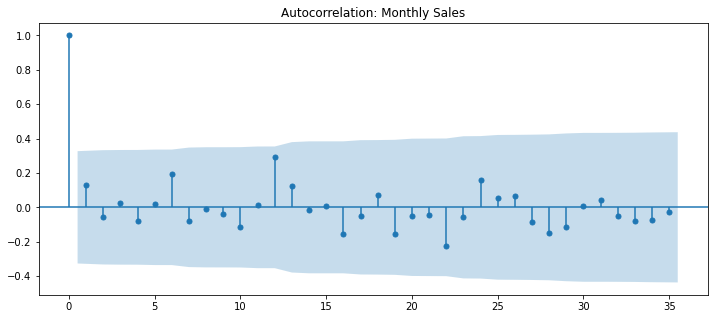

<Figure size 864x576 with 0 Axes>

In [38]:
# Now let's plot the autocorrelation at different lags
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

title='Autocorrelation: Monthly Sales'
lags = 35
fig = plt.figure(figsize=(12,8))
plot_acf(data_Sales['Sales'],title=title,lags=lags,ax=ax);

This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis. The first value $y_0$ is always 1. A sharp dropoff indicates that there is no AR component in the ARIMA model.

## PACF Plots
Partial autocorrelations work best with stationary data. 

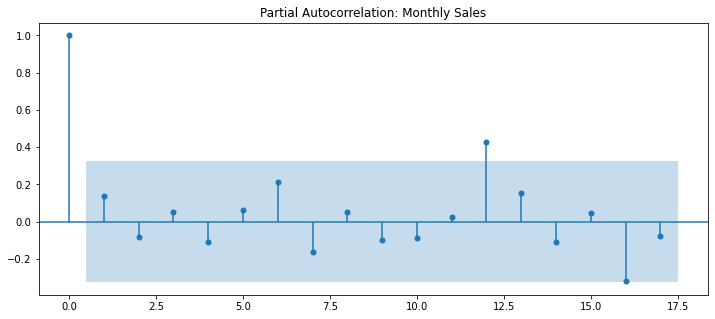

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

title='Partial Autocorrelation: Monthly Sales'
lags=17
plot_pacf(data_Sales['Sales'],title=title,lags=lags,ax=ax);

# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.



In [40]:
# Set one year for testing
train_data,test_data=data_Sales[0:24],data_Sales[24:36]

## Fit an AR(1) Model

In [41]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [42]:
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['Sales'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const       8.349326e+06
L1.Sales    8.564375e-02
dtype: float64


In [43]:
# This is the general format for obtaining predictions
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [44]:
predictions1

2018-01-01    1.030239e+07
2018-02-01    9.231661e+06
2018-03-01    9.139960e+06
2018-04-01    9.132107e+06
2018-05-01    9.131434e+06
2018-06-01    9.131377e+06
2018-07-01    9.131372e+06
2018-08-01    9.131371e+06
2018-09-01    9.131371e+06
2018-10-01    9.131371e+06
2018-11-01    9.131371e+06
2018-12-01    9.131371e+06
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [45]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test_data['Sales'][i]}")

predicted=10302389.02, expected=3596842.2400000007
predicted=9231661.477, expected=7845704.960000001
predicted=9139960.351, expected=13803425.28
predicted=9132106.722, expected=9529921.28
predicted=9131434.108, expected=18452922.240000002
predicted=9131376.503, expected=10478177.280000003
predicted=9131371.57 , expected=8492160.0
predicted=9131371.147, expected=6190337.2799999975
predicted=9131371.111, expected=14645379.839999998
predicted=9131371.108, expected=20181359.360000003
predicted=9131371.107, expected=17370277.76
predicted=9131371.107, expected=14286567.680000002


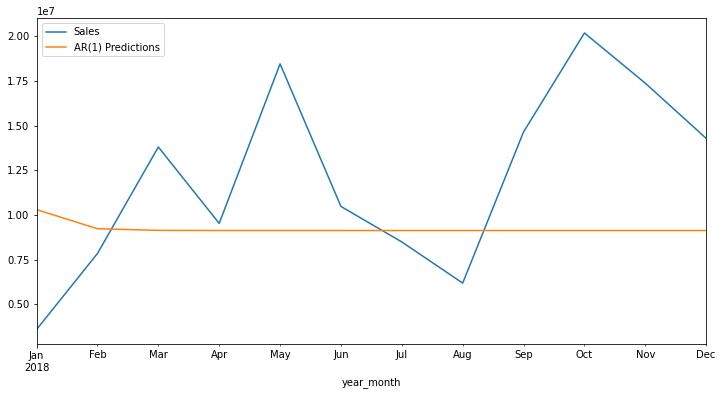

In [46]:
test['Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Fit an AR(2) Model

In [47]:
# Recall that our model was already created above based on the training set
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['Sales'])
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const       9.964631e+06
L1.Sales    5.304215e-02
L2.Sales   -1.429670e-01
dtype: float64


In [48]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

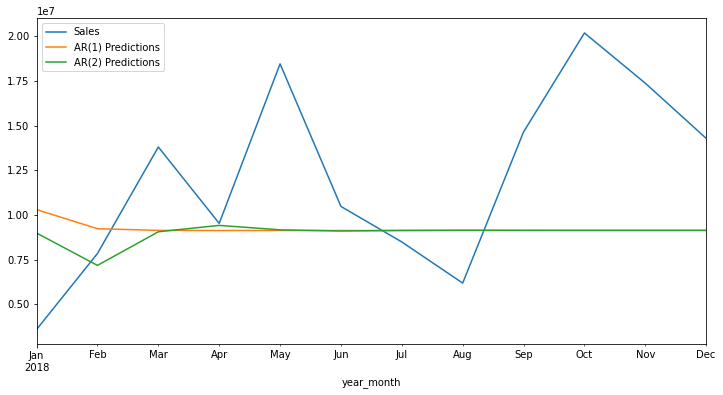

In [49]:
test_data['Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [50]:
from statsmodels.tsa.ar_model import AR,ARResults

model = AR(train_data['Sales'])
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 8
Coefficients:
const       1.545400e+07
L1.Sales    1.696373e-01
L2.Sales   -2.531081e-01
L3.Sales   -3.725260e-02
L4.Sales   -1.348726e-01
L5.Sales   -2.695260e-01
L6.Sales    1.421123e-01
L7.Sales   -4.629992e-01
L8.Sales    1.047223e-01
dtype: float64


In [51]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
rename = f'AR(8) Predictions'

predictions8 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

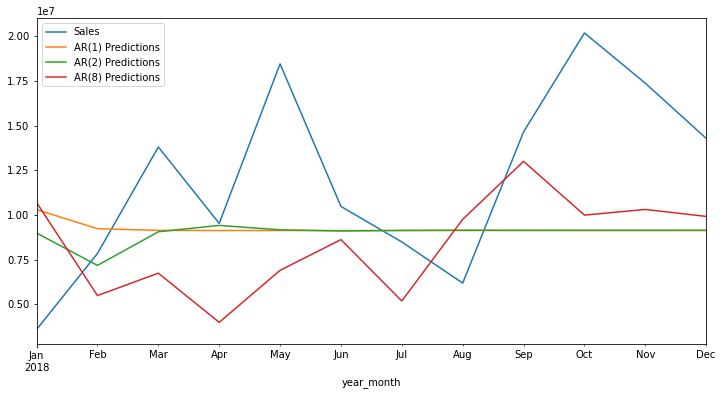

In [52]:
test['Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [53]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [predictions1, predictions2, predictions8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['Sales'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 3.44596539e+13
AR(2) Error: 3.296486909e+13
AR(8) Error: 3.935230403e+13


We see right away how well AR(8) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [54]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 31.513
AR(2) AIC: 31.593
AR(8) AIC: 31.784


## Evaluation of Models(MSE,RMSE)

In [55]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_data['Sales'], predictions8)
print(f'mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_data['Sales'], predictions8)
print(f' MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_data['Sales'], predictions8)
print(f' RMSE Error: {error_RMSE:11.10}')


mean_absolute_error:  5464409.14
 MSE Error: 3.935230403e+13
 RMSE Error:  6273141.48


## Retrain the model on the full data, and forecast the future (Sales for 2019) 

In [56]:
# First, retrain the model on the full dataset
model = AR(data_Sales['Sales'])

# Next, fit the model
ARfit = model.fit(maxlag=8,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(data_Sales), end=len(data_Sales)+11, dynamic=False).rename('Forecast')

fcast

2019-01-01    9.332102e+06
2019-02-01    7.848715e+06
2019-03-01    1.066308e+07
2019-04-01    1.132318e+07
2019-05-01    1.023708e+07
2019-06-01    1.003184e+07
2019-07-01    9.126221e+06
2019-08-01    9.422489e+06
2019-09-01    1.053977e+07
2019-10-01    1.035435e+07
2019-11-01    1.000553e+07
2019-12-01    1.008416e+07
Freq: MS, Name: Forecast, dtype: float64

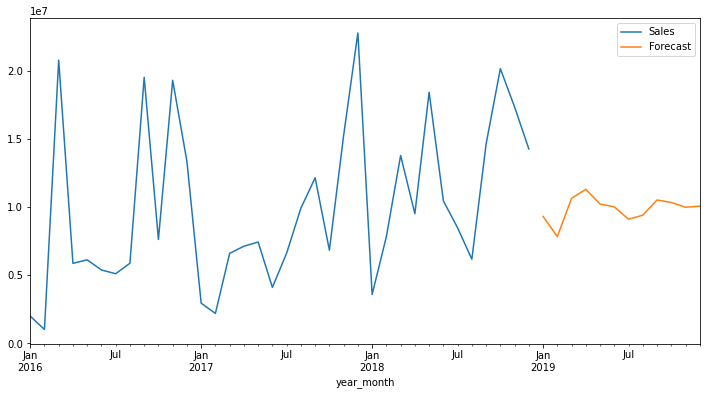

In [57]:

# Plot the results
data_Sales['Sales'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

___
# Choosing ARIMA Orders

* Goals
  * Understand PDQ terms for ARIMA (slides)
  * Understand how to choose orders manually from ACF and PACF
  * Understand how to use automatic order selection techniques using the functions below
  
Before we can apply an ARIMA forecasting model, we need to review the components of one.<br>
ARIMA, or Autoregressive Independent Moving Average is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.



## pmdarima Auto-ARIMA
This is a third-party tool separate from statsmodels. It should already be installed if you're using our virtual environment. If not, then at a terminal run:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<tt>pip install pmdarima</tt>

In [58]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [59]:
auto_arima(data_Sales['Sales'])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [60]:
auto_arima(data_Sales['Sales'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                        SARIMAX   Log Likelihood                -612.792
Date:                Thu, 01 Apr 2021   AIC                           1229.585
Time:                        23:18:55   BIC                           1232.752
Sample:                             0   HQIC                          1230.690
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.003e+07   1.16e+06      8.637      0.000    7.76e+06    1.23e+07
sigma2       3.57e+13   1.29e+13      2.758      0.006    1.03e+13    6.11e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.41   Prob(JB):                         0.23
Heteroskedasticity (H):               0.63   Skew:                             0.55
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This shows a recommended (p,d,q) ARIMA Order of (0,0,0), with no seasonal_order component.

We can see how this was determined by looking at the stepwise results. The recommended order is the one with the lowest <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> or AIC score. Note that the recommended model may <em>not</em> be the one with the closest fit. The AIC score takes complexity into account, and tries to identify the best <em>forecasting</em> model.

In [61]:
stepwise_fit = auto_arima(data_Sales['Sales'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1275.837, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1245.502, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1263.636, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1243.418, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1242.464, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1243.842, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1238.944, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1237.310, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1235.546, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1237.269, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1264.098, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1233.456, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1231.230, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : 

# ARMA(p,q) and ARIMA(p,d,q)
# Autoregressive Moving Averages
This section covers <em>Autoregressive Moving Averages</em> (ARMA) and <em>Autoregressive Integrated Moving Averages</em> (ARIMA).

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA models can be used on stationary datasets.

For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.




## Autoregressive Moving Average - ARMA(p,q)
With stationary dataset, we determine (p,q) orders, and run a forecasting ARMA model fit to the data. 

### We have determine the (p,q) ARMA Orders using <tt>pmdarima.auto_arima</tt>
That is ARMA(0,0)

In [62]:
# Set one year for testing
train_data_Sales,test_data_Sales=data_Sales[0:24],data_Sales[24:36]

### Fit an ARMA(p,q) Model


In [63]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

model = ARMA(train_data_Sales['Sales'],order=(0,0))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   24
Model:                     ARMA(0, 0)   Log Likelihood                -409.320
Method:                           css   S.D. of innovations        6175144.484
Date:                Thu, 01 Apr 2021   AIC                            822.639
Time:                        23:18:56   BIC                            824.995
Sample:                    01-01-2016   HQIC                           823.264
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.015e+06   1.26e+06      7.152      0.000    6.54e+06    1.15e+07
==============================================================================
"""

### Obtain a month's worth of predicted values

In [64]:
start=len(train_data_Sales)
end=len(train_data_Sales)+len(test_data_Sales)-1
predictions = results.predict(start=start, end=end).rename('ARMA(0,0) Predictions')
predictions

2018-01-01    9.014908e+06
2018-02-01    9.014908e+06
2018-03-01    9.014908e+06
2018-04-01    9.014908e+06
2018-05-01    9.014908e+06
2018-06-01    9.014908e+06
2018-07-01    9.014908e+06
2018-08-01    9.014908e+06
2018-09-01    9.014908e+06
2018-10-01    9.014908e+06
2018-11-01    9.014908e+06
2018-12-01    9.014908e+06
Freq: MS, Name: ARMA(0,0) Predictions, dtype: float64

### Plot predictions against known values

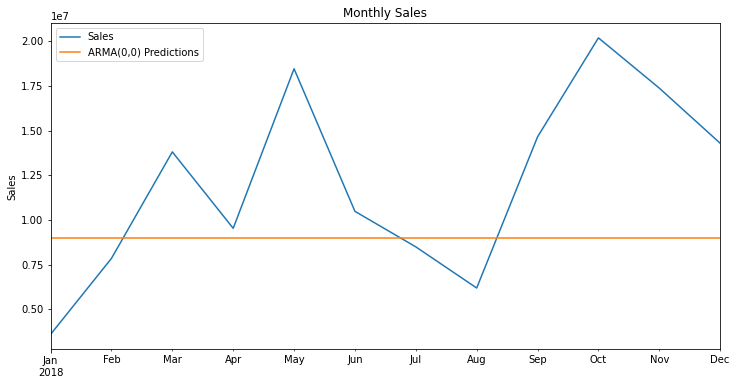

In [65]:
title = 'Monthly Sales'
ylabel='Sales'
xlabel='' # we don't really need a label here

ax = test_data_Sales['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Evaluation of Models(MSE,RMSE)

In [66]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_data_Sales['Sales'], predictions)
print(f'ARMA(0,0) mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_data_Sales['Sales'], predictions)
print(f'ARMA(0,0) MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_data_Sales['Sales'], predictions)
print(f'ARMA(0,0) RMSE Error: {error_RMSE:11.10}')

ARMA(0,0) mean_absolute_error: 4713612.924
ARMA(0,0) MSE Error: 3.394840068e+13
ARMA(0,0) RMSE Error: 5826525.609


In [67]:
model = ARMA(train_data_Sales['Sales'],order=(0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   24
Model:                     ARMA(0, 0)   Log Likelihood                -409.320
Method:                           css   S.D. of innovations        6175144.484
Date:                Thu, 01 Apr 2021   AIC                            822.639
Time:                        23:18:58   BIC                            824.995
Sample:                    01-01-2016   HQIC                           823.264
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.015e+06   1.26e+06      7.152      0.000    6.54e+06    1.15e+07
==============================================================================
"""

## Retrain the model on the full data, and forecast the future (Sales for 2019) 

In [68]:
model = ARMA(data_Sales['Sales'],order=(0,0))
results = model.fit()
fcast = results.predict(len(data_Sales),len(data_Sales)+11,typ='levels').rename('ARMA(0,0) Forecast')
fcast

2019-01-01    1.003419e+07
2019-02-01    1.003419e+07
2019-03-01    1.003419e+07
2019-04-01    1.003419e+07
2019-05-01    1.003419e+07
2019-06-01    1.003419e+07
2019-07-01    1.003419e+07
2019-08-01    1.003419e+07
2019-09-01    1.003419e+07
2019-10-01    1.003419e+07
2019-11-01    1.003419e+07
2019-12-01    1.003419e+07
Freq: MS, Name: ARMA(0,0) Forecast, dtype: float64

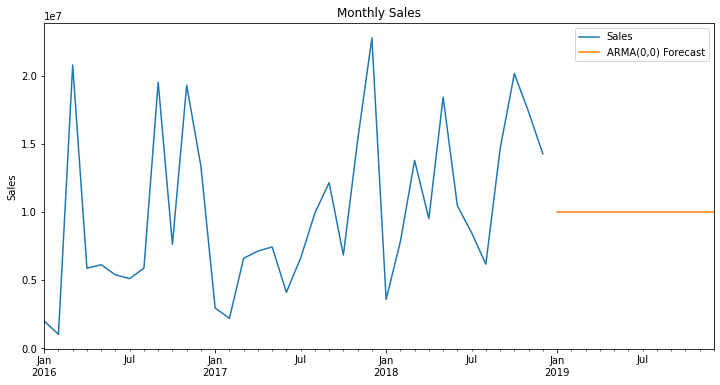

In [69]:
title = 'Monthly Sales'
ylabel='Sales'
xlabel='' # we don't really need a label here

ax = data_Sales['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Autoregressive Integrated Moving Average - ARIMA(p,d,q)
The steps are the same as for ARMA(p,q), except that we'll apply a differencing component to make the dataset stationary.<br>




### We have determined the  ARIMA(p,d,q)  Orders using <tt>pmdarima.auto_arima</tt>
That is ARIMA(0,0,0)

Now let's train & test the ARIMA(0,0,0) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [70]:
# Set one year for testing
train_data_Sales,test_data_Sales=data_Sales[0:24],data_Sales[24:36]

### Fit an ARIMA(p,d,q) Model

In [71]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

model = ARIMA(data_Sales['Sales'],order=(0,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                     ARMA(0, 0)   Log Likelihood                -612.792
Method:                           css   S.D. of innovations        5974847.475
Date:                Thu, 01 Apr 2021   AIC                           1229.585
Time:                        23:19:00   BIC                           1232.752
Sample:                    01-01-2016   HQIC                          1230.690
                         - 12-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.003e+07   9.96e+05     10.076      0.000    8.08e+06     1.2e+07
==============================================================================
"""

In [72]:
# Obtain predicted values
start=len(train_data_Sales)
end=len(train_data_Sales)+len(test_data_Sales)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(0,0,0) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

In [73]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data_Sales['Sales'][i]}")

predicted=10034190.61, expected=3596842.2400000007
predicted=10034190.61, expected=7845704.960000001
predicted=10034190.61, expected=13803425.28
predicted=10034190.61, expected=9529921.28
predicted=10034190.61, expected=18452922.240000002
predicted=10034190.61, expected=10478177.280000003
predicted=10034190.61, expected=8492160.0
predicted=10034190.61, expected=6190337.2799999975
predicted=10034190.61, expected=14645379.839999998
predicted=10034190.61, expected=20181359.360000003
predicted=10034190.61, expected=17370277.76
predicted=10034190.61, expected=14286567.680000002


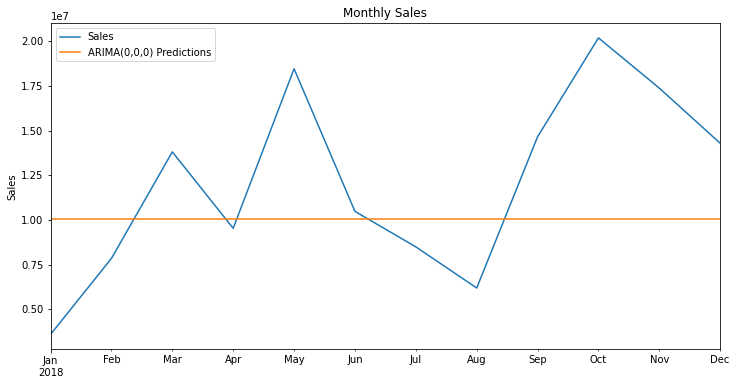

In [74]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='Sales'
xlabel='' # we don't really need a label here

ax = test_data_Sales['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


## Evaluation of Models(MSE,RMSE)

In [75]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_data_Sales['Sales'], predictions)
print(f'ARIMA(0,0,0) mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_data_Sales['Sales'], predictions)
print(f'ARIMA(0,0,0) MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_data_Sales['Sales'], predictions)
print(f'ARIMA(0,0,0) RMSE Error: {error_RMSE:11.10}')

ARIMA(0,0,0) mean_absolute_error: 4457896.871
ARIMA(0,0,0) MSE Error: 2.875371327e+13
ARIMA(0,0,0) RMSE Error: 5362248.901


## Retrain the model on the full data, and forecast the future (Sales for 2019) 

In [76]:
model = ARIMA(data_Sales['Sales'],order=(0,0,0))

results = model.fit()
fcast = results.predict(len(data_Sales),len(data_Sales)+11,typ='levels',return_conf_int=True,alpha=0.05).rename('ARIMA(0,0,0) Forecast')
fcast


2019-01-01    1.003419e+07
2019-02-01    1.003419e+07
2019-03-01    1.003419e+07
2019-04-01    1.003419e+07
2019-05-01    1.003419e+07
2019-06-01    1.003419e+07
2019-07-01    1.003419e+07
2019-08-01    1.003419e+07
2019-09-01    1.003419e+07
2019-10-01    1.003419e+07
2019-11-01    1.003419e+07
2019-12-01    1.003419e+07
Freq: MS, Name: ARIMA(0,0,0) Forecast, dtype: float64

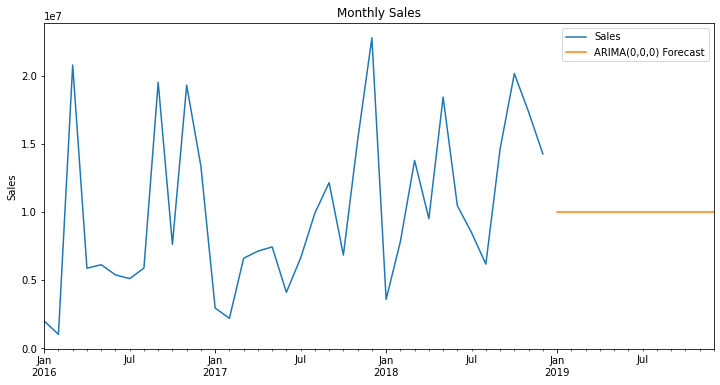

In [77]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='Sales'
xlabel='' # we don't really need a label here

ax = data_Sales['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages
We have finally reached one of the most fascinating aspects of time series analysis: seasonality.

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. We'll cover these in the next section.




In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.
#### For SARIMA Orders we set seasonal=True and pass in an m value

In [79]:
auto_arima(data_Sales['Sales'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   36
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                -611.085
Date:                    Thu, 01 Apr 2021   AIC                           1228.169
Time:                            23:19:05   BIC                           1232.920
Sample:                                 0   HQIC                          1229.827
                                     - 36                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.003e+07   1.28e+06      7.831      0.000    7.52e+06    1.25e+07
ma.S.L12       0.3361      0.344      0.976      0.329      -0.339       1.011
sigma2       3.57e+13      0.076   4.67e+14      0.000    3.57e+13    3.57e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 3.07
Prob(Q):                              0.51   Prob(JB):                         0.22
Heteroskedasticity (H):               0.70   Skew:                             0.62
Prob(H) (two-sided):                  0.55   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+30. Standard errors may be unstable.
"""

This provides an ARIMA Order of (0,0,0) combined with a seasonal order of (0, 0, [1], 12) Now let's train & test the SARIMA(0,0,0)(0, 0, [1], 12) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [80]:
# Set one year for testing
train_Sales_data,test_Sales_data=data_Sales[0:24],data_Sales[24:36]

### Fit a SARIMA(0,0,0)(0, 0, [1], 12) Model

In [81]:
model = SARIMAX(train_Sales_data['Sales'],order=(0,0,0),seasonal_order=(0, 0, [1], 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                      Sales   No. Observations:                   24
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood                -418.234
Date:                    Thu, 01 Apr 2021   AIC                            840.469
Time:                            23:19:06   BIC                            842.825
Sample:                        01-01-2016   HQIC                           841.094
                             - 12-01-2017                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.9993      0.217      4.597      0.000       0.573       1.425
sigma2      3.661e+13   5.94e-15   6.16e+27      0.000    3.66e+13    3.66e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 3.47
Prob(Q):                              0.51   Prob(JB):                         0.18
Heteroskedasticity (H):               0.87   Skew:                             0.93
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.82e+43. Standard errors may be unstable.
"""

In [82]:
# Obtain predicted values
start=len(train_Sales_data)
end=len(train_Sales_data)+len(test_Sales_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,0,0)(1,0,(1,2),12) Predictions')

In [83]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_Sales_data['Sales'][i]}")

predicted=1302915.451, expected=3596842.2400000007
predicted=1128411.335, expected=7845704.960000001
predicted=-2522307.516, expected=13803425.28
predicted=2800312.899, expected=9529921.28
predicted=2919705.724, expected=18452922.240000002
predicted=946083.6844, expected=10478177.280000003
predicted=2717396.176, expected=8492160.0
predicted=4659114.018, expected=6190337.2799999975
predicted=1599293.583, expected=14645379.839999998
predicted=2020642.347, expected=20181359.360000003
predicted=3743102.773, expected=17370277.76
predicted=10745780.84, expected=14286567.680000002


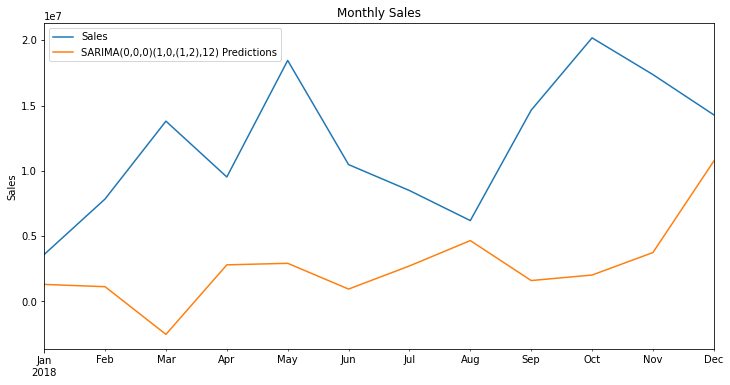

In [84]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='Sales'
xlabel=''

ax = test_Sales_data['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Evaluation of Models(MSE,RMSE)

In [85]:
from sklearn.metrics import mean_absolute_error

error_mean_absolute_error = mean_absolute_error(test_Sales_data['Sales'], predictions)
print(f'SARIMA(0,0,0)(0, 0, [1], 12) mean_absolute_error: {error_mean_absolute_error:11.10}')

from sklearn.metrics import mean_squared_error

error_MSE = mean_squared_error(test_Sales_data['Sales'], predictions)
print(f'SARIMA(0,0,0)(0, 0, [1], 12) MSE Error: {error_MSE:11.10}')

from statsmodels.tools.eval_measures import rmse

error_RMSE = rmse(test_Sales_data['Sales'], predictions)
print(f'SARIMA(0,0,0)(0, 0, [1], 12) RMSE Error: {error_RMSE:11.10}')



SARIMA(0,0,0)(0, 0, [1], 12) mean_absolute_error: 9401051.991
SARIMA(0,0,0)(0, 0, [1], 12) MSE Error: 1.190237132e+14
SARIMA(0,0,0)(0, 0, [1], 12) RMSE Error: 10909798.95


## Retrain the model on the full data, and forecast the future (Sales for 2019) 

In [86]:
model = SARIMAX(data_Sales['Sales'],order=(0,0,0),seasonal_order=(0, 0, [1], 12))
results = model.fit()
fcast = results.predict(len(data_Sales),len(data_Sales)+11,typ='levels').rename('SARIMA(0,0,0)(0, 0, [1], 12) Forecast')
fcast

2019-01-01    1.720445e+06
2019-02-01    5.037969e+06
2019-03-01    1.224430e+07
2019-04-01    5.047205e+06
2019-05-01    1.164991e+07
2019-06-01    7.149069e+06
2019-07-01    4.331072e+06
2019-08-01    1.148416e+06
2019-09-01    9.784564e+06
2019-10-01    1.362054e+07
2019-11-01    1.022038e+07
2019-12-01    2.655588e+06
Freq: MS, Name: SARIMA(0,0,0)(0, 0, [1], 12) Forecast, dtype: float64

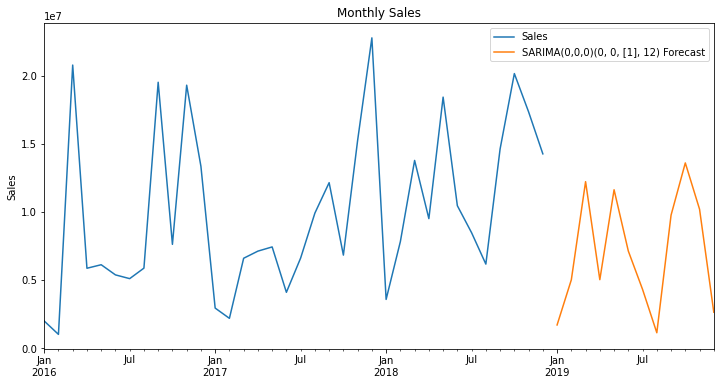

In [87]:
# Plot predictions against known values
title = 'Monthly Sales'
ylabel='Sales'
xlabel=''

ax = data_Sales['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

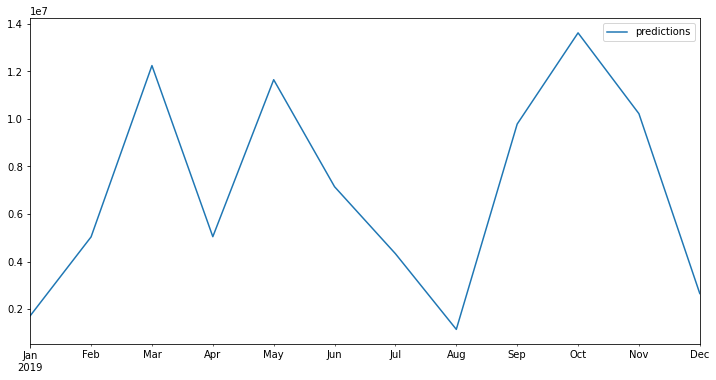

In [88]:
fcast.plot(label='predictions',figsize=(12,6))
plt.legend()
plt.show()

### Final conclusion 

RMSE : Root Mean Square Error  
The less RMSE indicates the better model.

___
                model                   |      RMSE
                1. Holt-Winters-Method  |      6612971.301
                2. AR(p)                |      6273141.48
                3. ARMA                 |      5826525.609
                4. ARIMA                |      5362248.901
                5. SARIMA               |      10909798.95
               

>Best Model : Auto Regressive Integrated Moving Average (ARIMA) 
